# National Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The National Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway.  The goal of the test is to evaluate students’ level of knowledge regarding the curriculum taught at higher education institutions, regardless of what they have learned in secondary school. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge. The test primarily emphasizes programming taught in mathematics curriculum, as it is the most prevalent source of programming knowledge.

This Notebook is a dynamic report of the results from 2023. The (static) written report can be found here: https://programmeringstesten.no/ 

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for amigious data.

`grade_submissions.py` replaces all responses with the number of points they recieved based on the rubric (`rubric.json`)

In [12]:
!python clean_data.py
!python grade_submissions.py

Replace escape characters: dict_items([('&lt;', '<'), ('&gt;', '>'), ('&#61;', '='), ('&#34;', '"'), ('&#43;', '+')])
Replace all ambigious institutions with standardized labels: ['UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU']
Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
Rename columns with simpler titles. Easier to use in analysis.
Removed all institutions that are not in: ['UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU']
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Removed false entries
Removed blank submissions: 57
Max score: 22.599999999999998
Submissions to be graded: 2030
Submissions graded.


In [68]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [56]:
# Filter by institution
specific_institutions = ['UiB'] # 'UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU', ' '
df = df[(df['Institution'].isin(specific_institutions))]

# Filter by Graduate Year
specific_graduateyears = ['Før 2020', '2020', '2021 - 2022', '2023'] # 'Før 2020', '2020', '2021 - 2022', '2023'
df = df[(df['GraduateYear'].isin(specific_graduateyears))]

# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
df = df[(df['Gender'].isin(specific_genders))]

# Filter by programming elective
specific_electives = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X'] 
#df = df[(df['IT1'].isin(specific_electives))]
#df = df[(df['IT2'].isin(specific_electives))]
#df = df[(df['PMX'].isin(specific_electives))]

## Demographics
See the background of the students.

In [57]:
# Total number of students
print(f"The dataset has {len(df['Total'])} number of students.")

The dataset has 323 number of students.



### Institutions
Note that there are a large number of submissions that are blank. This is due to the students submitting ambigious answers, which have not been labled by `clean_data.py`.

Institution
NTNU          694
UiB           323
              272
NMBU          202
UiS           107
UiO            60
Kristiania     55
HvL            53
Name: count, dtype: int64


<Axes: ylabel='count'>

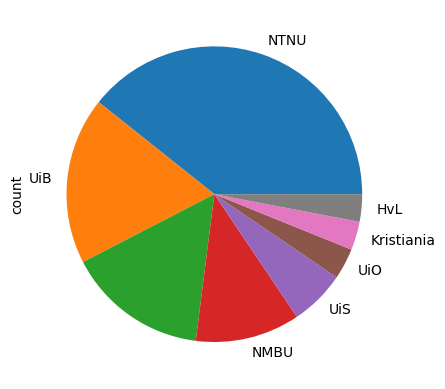

In [70]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
2021 - 2022    800
2023           483
Før 2020       338
2020           142
Name: count, dtype: int64


<Axes: ylabel='count'>

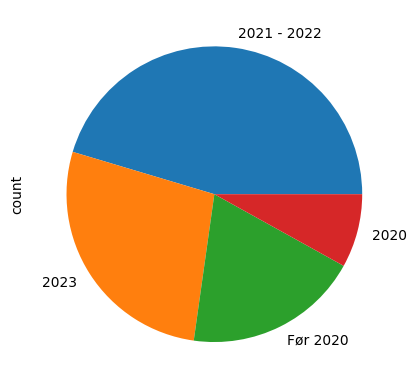

In [71]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie()

### Gender

Gender
m    986
f    641
     139
Name: count, dtype: int64


<Axes: ylabel='count'>

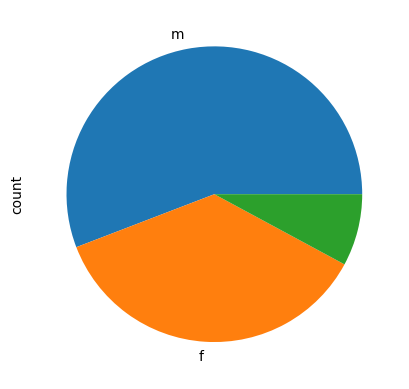

In [72]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
df[gender_column].value_counts().plot.pie()

## Educational Background
What courses have these students taken?

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [73]:
# Make new column for NO elective programming course
courses = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X']
df_temp = df[(~df['IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

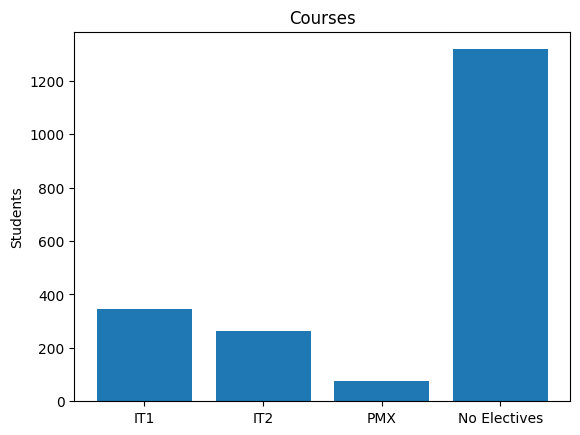

In [74]:
fig, ax = plt.subplots()

courses = ['IT1', 'IT2', 'PMX', 'No Electives']
n_it1 = df['IT1'].value_counts()['Informasjonsteknologi 1 (IT1)']
n_it2 = df['IT2'].value_counts()['Informasjonsteknologi 2 (IT2)']
n_pmx = df['PMX'].value_counts()['Programmering og modellering X']
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

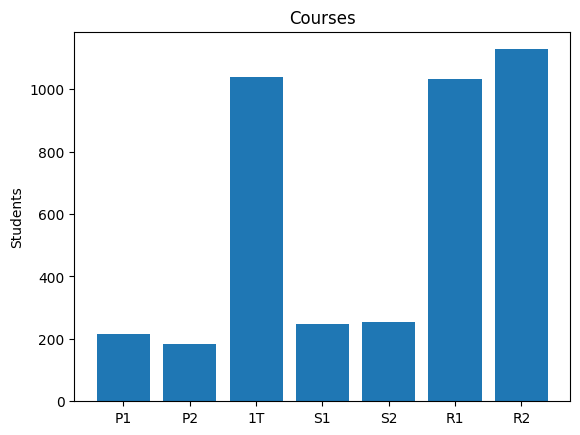

In [75]:
fig, ax = plt.subplots()

courses = ['P1', 'P2', '1T', 'S1', 'S2', 'R1', 'R2']
n_p1 = df['P1'].value_counts()['1P']
n_p2 = df['P2'].value_counts()['2P']
n_1t = df['T1'].value_counts()['1T']
n_s1 = df['S1'].value_counts()['S1']
n_s2 = df['S2'].value_counts()['S2']
n_r1 = df['R1'].value_counts()['R1']
n_r2 = df['R2'].value_counts()['R2']
counts = [n_p1, n_p2, n_1t, n_s1, n_s2, n_r1, n_r2]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. We also take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [76]:
# Configurations
bins = 23
edgecolor = 'red'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 22.6.

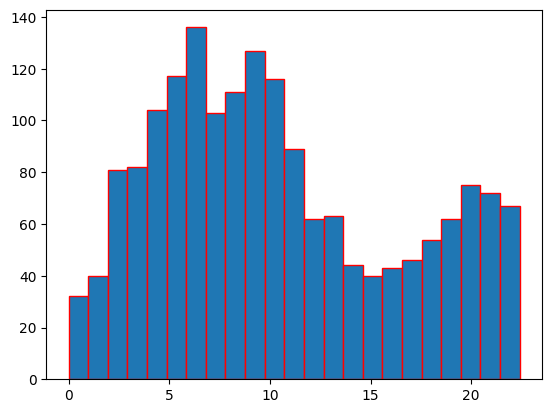

In [77]:
x = df['Total']

plt.hist(x, edgecolor=edgecolor, bins=bins)
plt.show() 

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

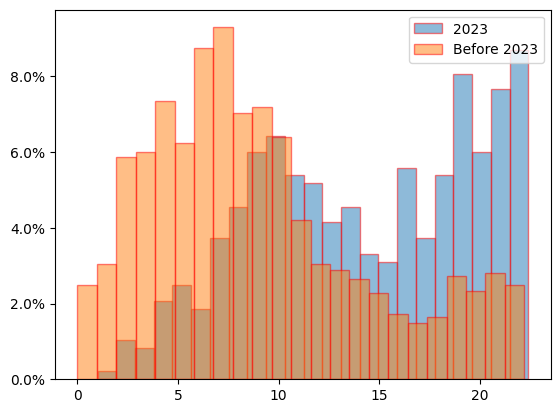

In [78]:
x = df[(df['GraduateYear'] == '2023')]['Total']
y = df[(df['GraduateYear'].isin(['Før 2020', '2020', '2021 - 2022']))]['Total']

plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label='2023', weights=np.ones(len(x)) / len(x))
plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label='Before 2023', weights=np.ones(len(y)) / len(y))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(loc='upper right')
plt.show()

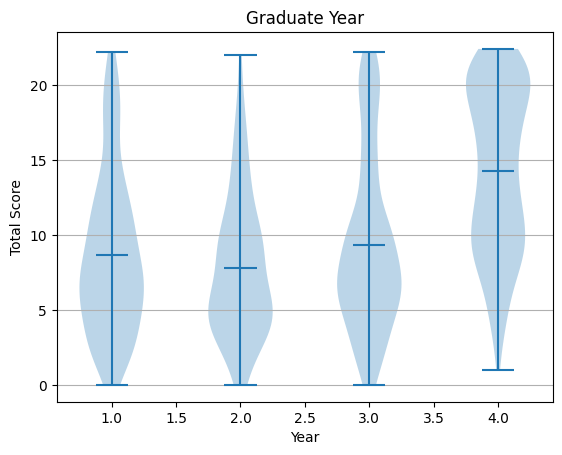

In [79]:
fig, axes = plt.subplots()

axes.violinplot(dataset = [df[df.GraduateYear == 'Før 2020']["Total"].values,
                           df[df.GraduateYear == '2020']["Total"].values,
                           df[df.GraduateYear == '2021 - 2022']["Total"].values,
                           df[df.GraduateYear == '2023']["Total"].values],
                           
                           showmeans=True)

axes.set_title('Graduate Year')
axes.yaxis.grid(True)
axes.set_xlabel('Year')
axes.set_ylabel('Total Score')

plt.show()

# Compare two groups

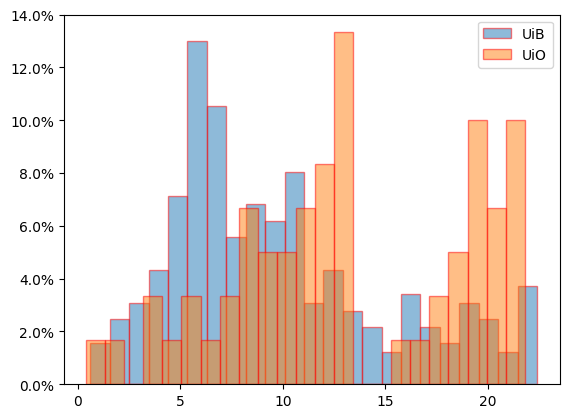

In [81]:
# Select which student groups you want to compare
x = df[(df['Institution'] == 'UiB')]['Total']
y = df[(df['Institution'] == 'UiO')]['Total']

# Change lables as desired
plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label='UiB', weights=np.ones(len(x)) / len(x))
plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label='UiO', weights=np.ones(len(y)) / len(y))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend(loc='upper right')
plt.show()